In [1]:
import sys
sys.path.append("..")

from dsvit.model import DSViTDetector, ViTBaseline, DSViT_NoPreEncoder, DSViT_NoMultiScale
from dsvit.dataset import BrainTumorDataset
from dsvit.utils import plot_confusion_matrix, print_classification_report
from torch.utils.data import Subset, DataLoader
import torch.nn.functional as F
import torch
import numpy as np


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classes = {1: 'Meningioma', 2: 'Pituitary', 3: 'Glioma'}
class_names = [classes[i] for i in range(1, 4)]
dataset = BrainTumorDataset("/Users/darshdave/Documents/BRAINTUMOR/DATASET/FILES/")
test_ids = list(range(6))
test_loader = DataLoader(Subset(dataset, test_ids), batch_size=1)

In [3]:
model_variants = {
    "ViT-Baseline": ViTBaseline(),
    "No Pre-Encoder": DSViT_NoPreEncoder(),
    "No Multi-Scale": DSViT_NoMultiScale(),
    "best_dsvit_detector": DSViTDetector()
}


📊 Evaluating: ViT-Baseline


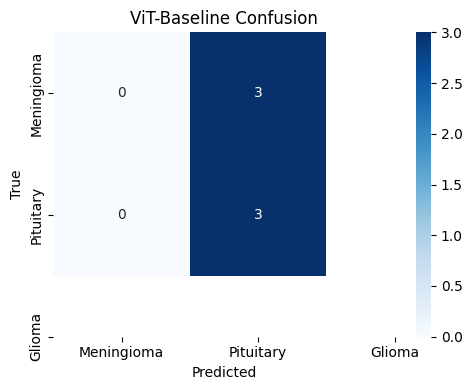

Classification Report:

              precision    recall  f1-score   support

  Meningioma       0.00      0.00      0.00         3
      Glioma       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6


📊 Evaluating: No Pre-Encoder


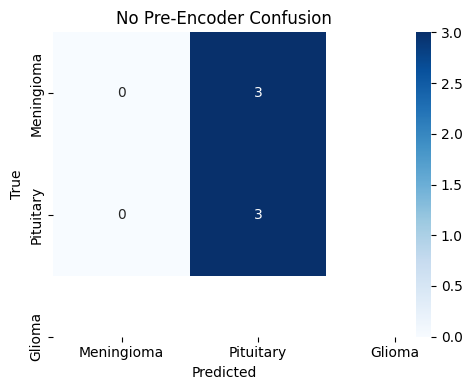

Classification Report:

              precision    recall  f1-score   support

  Meningioma       0.00      0.00      0.00         3
      Glioma       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6


📊 Evaluating: No Multi-Scale


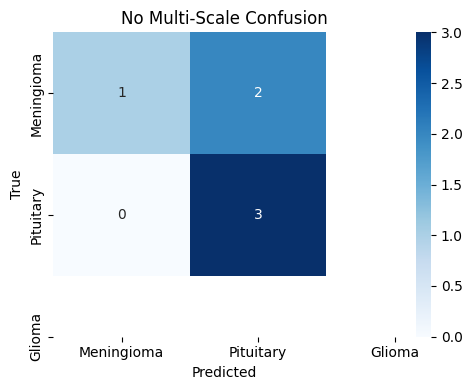

Classification Report:

              precision    recall  f1-score   support

  Meningioma       1.00      0.33      0.50         3
      Glioma       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6


📊 Evaluating: best_dsvit_detector


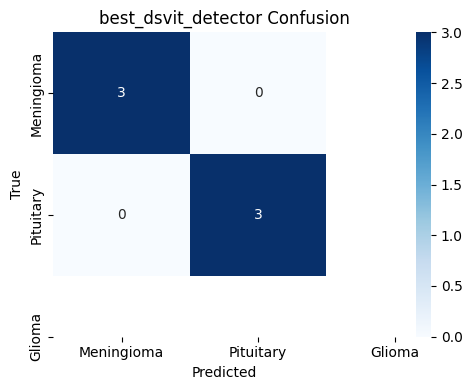

Classification Report:

              precision    recall  f1-score   support

  Meningioma       1.00      1.00      1.00         3
      Glioma       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [4]:
for name, model in model_variants.items():
    print(f"\n📊 Evaluating: {name}")
    model.load_state_dict(torch.load(f"/Users/darshdave/Documents/BRAINTUMOR/DSVIT/model-weight/{name.replace(' ', '_')}.pth"))
    model = model.to(device)
    model.eval()

    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x = x.to(device)
            y_true = y.item()
            _, logits = model(x)
            probs = F.softmax(logits, dim=1).cpu().numpy()
            pred = np.argmax(probs)
            all_preds.append(pred)
            all_labels.append(y_true - 1)

    plot_confusion_matrix(all_labels, all_preds, class_names, title=f"{name} Confusion")
    print_classification_report(all_labels, all_preds, class_names)